# Customer Segmentation using RFM Analysis

### Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
df1 = pd.read_excel('OnlineRetail.xlsx', sheet_name='Year 2009-2010')

In [3]:
df1.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [4]:
df1.shape

(525461, 8)

In [5]:
df2 = pd.read_excel('OnlineRetail.xlsx', sheet_name='Year 2010-2011')

In [6]:
df2.head()

Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00   2.55      17850.0  United Kingdom  
1 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
2 2010-12-01 08:26:00   2.75      17850.0  United Kingdom  
3 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
4 2010-12-01 08:26:00   3.39      17850.0  United Kingdom

In [7]:
df2.shape

(541910, 8)

In [8]:
df = pd.concat([df1, df2])

In [9]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [10]:
df.tail()

Invoice StockCode                      Description  Quantity  \
541905  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                          POSTAGE         1   

               InvoiceDate  Price  Customer ID Country  
541905 2011-12-09 12:50:00   2.10      12680.0  France  
541906 2011-12-09 12:50:00   4.15      12680.0  France  
541907 2011-12-09 12:50:00   4.15      12680.0  France  
541908 2011-12-09 12:50:00   4.95      12680.0  France  
541909 2011-12-09 12:50:00  18.00      12680.0  France

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.shape

(1067371, 8)

###### **Customer ID** is used to distinguish the customers. **Invoice** can be used to group all the items of a single transaction.  

In [13]:
df.describe()

Quantity                    InvoiceDate         Price  \
count  1.067371e+06                        1067371  1.067371e+06   
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00   
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00   
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00   
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04   
std    1.727058e+02                            NaN  1.235531e+02   

         Customer ID  
count  824364.000000  
mean    15324.638504  
min     12346.000000  
25%     13975.000000  
50%     15255.000000  
75%     16797.000000  
max     18287.000000  
std      1697.464450

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### Data Cleaning and Visualization

We have some negative values in price and quantity columns.

In [15]:
df[df['Quantity'] < 0]

Invoice StockCode                       Description  Quantity  \
178      C489449     22087          PAPER BUNTING WHITE LACE       -12   
179      C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180      C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181      C489449     21896                POTTING SHED TWINE        -6   
182      C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...          ...       ...                               ...       ...   
1065910  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
1067002  C581499         M                            Manual        -1   
1067176  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
1067177  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
1067178  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate   Price  Customer ID         Country  
178     2009-12-01 10:33:00    2.95      16321.0       Australia  
179     2009-12-01 10:33:00    1.65      16321.0       Australia  
180     2009-12-01 10:33:00    4.25      16321.0       Australia  
181     2009-12-01 10:33:00    2.10      16321.0       Australia  
182     2009-12-01 10:33:00    2.95      16321.0       Australia  
...                     ...     ...          ...             ...  
1065910 2011-12-09 09:57:00    0.83      14397.0  United Kingdom  
1067002 2011-12-09 10:28:00  224.69      15498.0  United Kingdom  
1067176 2011-12-09 11:57:00   10.95      15311.0  United Kingdom  
1067177 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  
1067178 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  

[22950 rows x 8 columns]

In [16]:
df[df['Price'] < 0]

Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   
825444  A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
825445  A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

           Price  Customer ID         Country  
179403 -53594.36          NaN  United Kingdom  
276274 -44031.79          NaN  United Kingdom  
403472 -38925.87          NaN  United Kingdom  
825444 -11062.06          NaN  United Kingdom  
825445 -11062.06          NaN  United Kingdom

###### These transactions could represent cancelled orders by customers or bad debt incurred by the business.

In [17]:
df[df['Price'] == 0]

Invoice StockCode                   Description  Quantity  \
263      489464     21733                  85123a mixed       -96   
283      489463     71477                         short      -240   
284      489467    85123A                   21733 mixed      -192   
470      489521     21646                           NaN       -50   
3114     489655     20683                           NaN       -44   
...         ...       ...                           ...       ...   
1062442  581234     72817                           NaN        27   
1063965  581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
1063966  581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
1064015  581408     85175                           NaN        20   
1064386  581422     23169                       smashed      -235   

                InvoiceDate  Price  Customer ID         Country  
263     2009-12-01 10:52:00    0.0          NaN  United Kingdom  
283     2009-12-01 10:52:00    0.0          NaN  United Kingdom  
284     2009-12-01 10:53:00    0.0          NaN  United Kingdom  
470     2009-12-01 11:44:00    0.0          NaN  United Kingdom  
3114    2009-12-01 17:26:00    0.0          NaN  United Kingdom  
...                     ...    ...          ...             ...  
1062442 2011-12-08 10:33:00    0.0          NaN  United Kingdom  
1063965 2011-12-08 13:58:00    0.0          NaN  United Kingdom  
1063966 2011-12-08 13:58:00    0.0          NaN  United Kingdom  
1064015 2011-12-08 14:06:00    0.0          NaN  United Kingdom  
1064386 2011-12-08 15:24:00    0.0          NaN  United Kingdom  

[6202 rows x 8 columns]

###### We also have rows where price is equal to 0. Those may be free products. So, we are keeping them.

In [18]:
#filtering rows having quantity and price lesser than 0
df = df[(df['Quantity'] >= 0) & (df['Price'] >= 0)]

In [19]:
#removing duplicate rows
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(1010535, 8)

In [21]:
#checking null values
df.isnull().sum()

Invoice             0
StockCode           0
Description      1642
Quantity            0
InvoiceDate         0
Price               0
Customer ID    231040
Country             0
dtype: int64

Invoice         0.00
StockCode       0.00
Description     0.16
Quantity        0.00
InvoiceDate     0.00
Price           0.00
Customer ID    22.86
Country         0.00
dtype: float64


<Axes: >

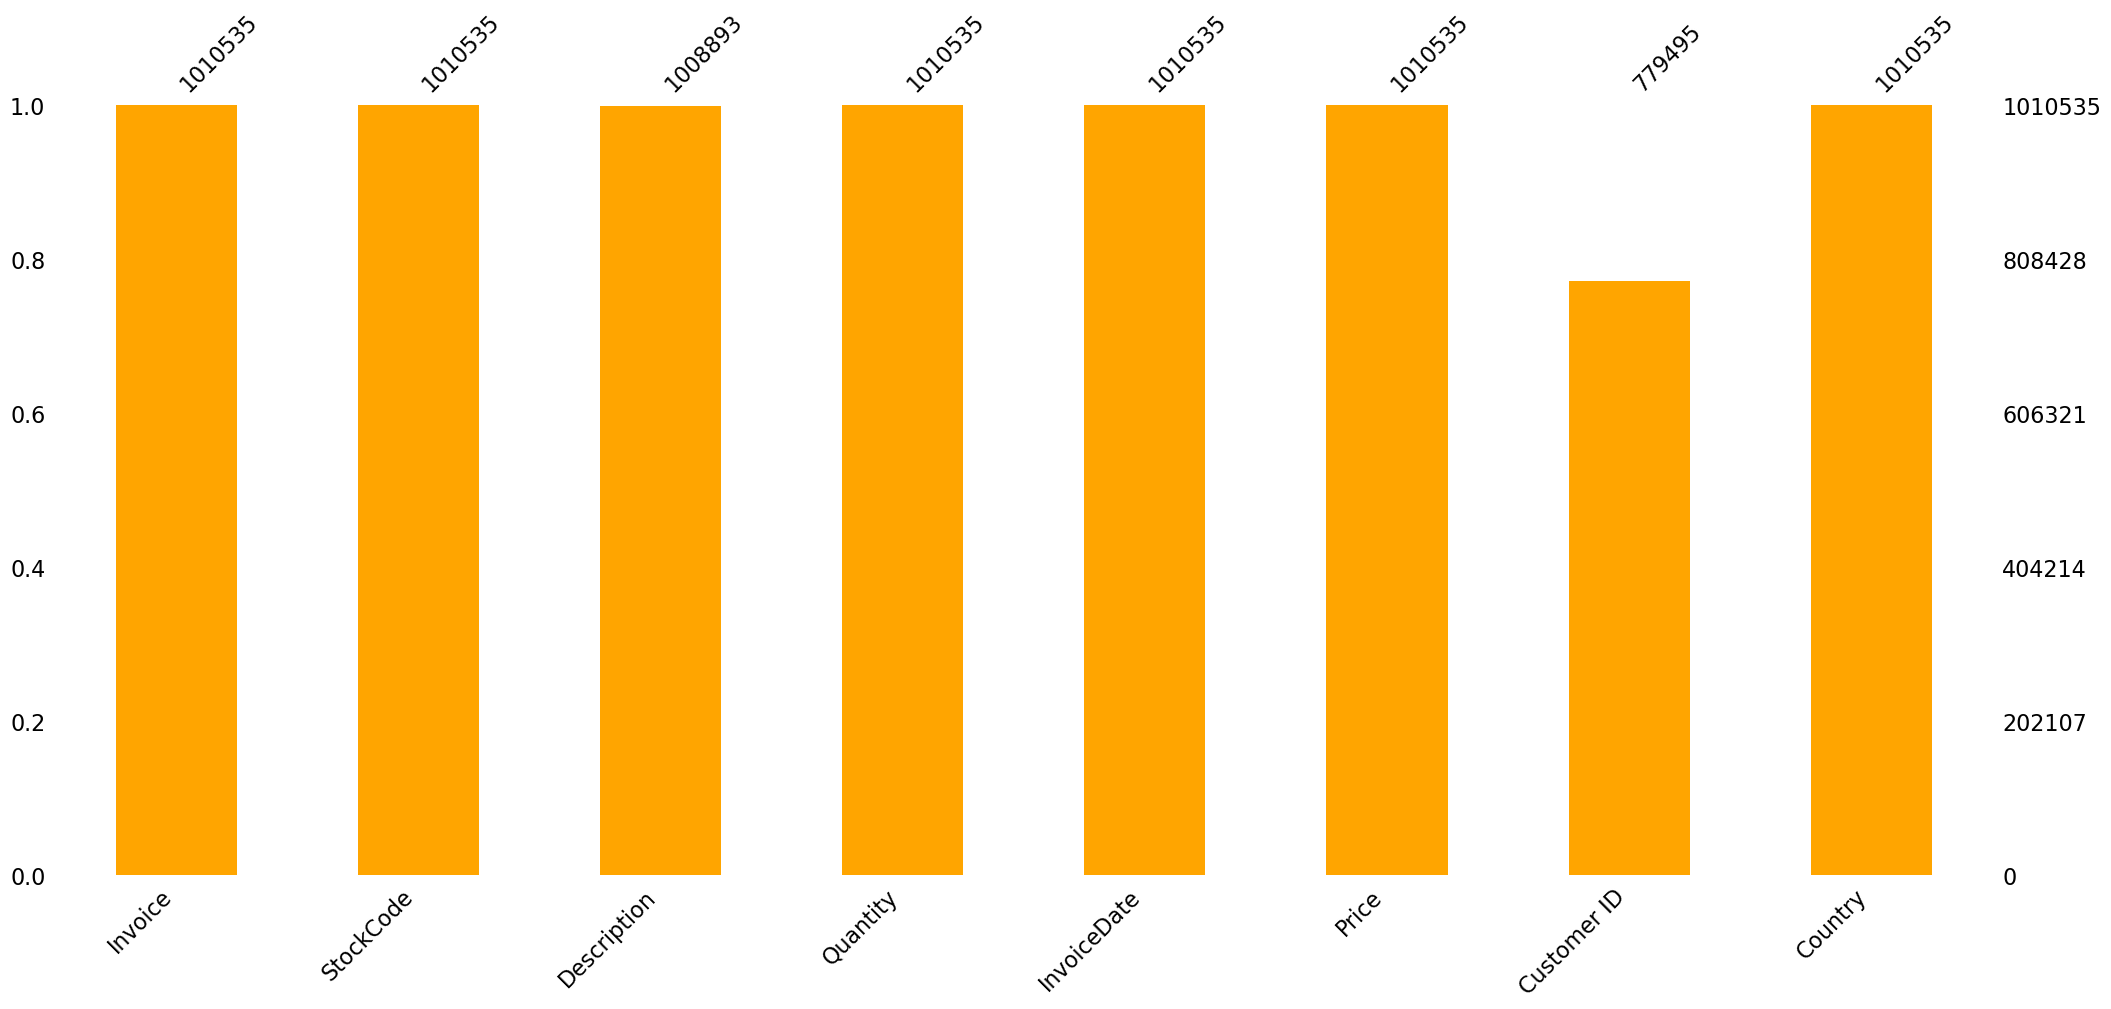

In [22]:
import missingno as msno

#calculating the percentage of missing values
missing_values_percentage = round(100 * (df.isnull().sum()) / len(df), 2)

#printing the percentage of missing values
print(missing_values_percentage)

#visualizing the missing values using missingno
plt.figure(figsize=(10, 6))
msno.bar(df, color="orange")

In [23]:
null_customer_id = df[df['Customer ID'].isnull()]
non_null_customer_id = df[df['Customer ID'].notnull()]

In [24]:
matching_invoices = null_customer_id[null_customer_id['Invoice'].isin(non_null_customer_id['Invoice'])]
matching_invoices

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

###### We didn't find any matching invoice for the null customer ids in the non-null customer id rows. So, we cannot replace customer ids.

In [25]:
#dropping rows having null customer ids
df = df.dropna(subset=["Customer ID"])

In [26]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [27]:
df.shape

(779495, 8)

In [28]:
#changing the datatype of Customer ID
df["Customer ID"] = df["Customer ID"].astype("str")
print(df["Customer ID"].dtype)

object


In [29]:
df.describe()

Quantity                    InvoiceDate          Price
count  779495.000000                         779495  779495.000000
mean       13.507085  2011-01-03 01:46:36.061116416       3.218199
min         1.000000            2009-12-01 07:45:00       0.000000
25%         2.000000            2010-07-02 14:39:00       1.250000
50%         6.000000            2010-12-02 14:09:00       1.950000
75%        12.000000            2011-08-01 13:48:00       3.750000
max     80995.000000            2011-12-09 12:50:00   10953.500000
std       146.540284                            NaN      29.674823

In [30]:
#checking percenatge of countries
countries = round(100*(df.Country.value_counts()/len(df)), 2)[:10]

#creating bar plot
fig = px.bar(x=countries.index,
             y=countries.values,
             color=countries.index,
             text=countries.values,
             title="Customer Base by Countries")

#updating layout for better appearance
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Percentage",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

###### As customer clusters may vary by geography, we will restrict the data to only United Kingdom customers, which contains most of our customer’s historical data (around 90% of customers)

In [31]:
df = df[df.Country=='United Kingdom']

In [32]:
df.shape

(700434, 8)

In [33]:
#getting the top 10 most preferred products
most_preferred_products = df['Description'].value_counts()[:10]

#creating bar plot
fig = px.bar(x=most_preferred_products.index,
             y=most_preferred_products.values,
             color=most_preferred_products.index,
             text=most_preferred_products.values,
             title="Top 10 Most Preferred Products")

#updating layout for better appearance
fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

### Data Preparation

We are going to analyse the customers based on below 3 factors:
* **R (Recency)**: Number of days since last purchase
* **F (Frequency)**: Number of transactions
* **M (Monetary)**: Totat amount of transactions (revenue contributed)

#### Recency

In [34]:
#to calculate recency, converting InvoiceDate to proper datetime format
import datetime as dt

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

In [35]:
#retrieving the last transaction date
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:49:00')

In [36]:
#calculating difference between max date and transaction date
df["Diff"] = max_date - df["InvoiceDate"]
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country              Diff  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom 738 days 05:04:00  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom 738 days 05:04:00  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom 738 days 05:04:00  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom 738 days 05:04:00  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom 738 days 05:04:00

In [37]:
#computing the recency of customers
rfm_r = df.groupby('Customer ID')['Diff'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

Customer ID              Diff
0     12346.0 325 days 02:48:00
1     12608.0 404 days 02:00:00
2     12745.0 486 days 02:35:00
3     12746.0 540 days 02:08:00
4     12747.0   1 days 22:15:00

In [38]:
#extracting number of days only
rfm_r['Diff'] = rfm_r['Diff'].dt.days
rfm_r.head()

Customer ID  Diff
0     12346.0   325
1     12608.0   404
2     12745.0   486
3     12746.0   540
4     12747.0     1

#### Frequency

In [39]:
#grouping customer ids and counting total number of unique invoices
rfm_f = df.groupby("Customer ID")["Invoice"].nunique()
rfm_f = rfm_f.reset_index()

In [40]:
rfm_f.columns = ["Customer ID", "Frequency"]
rfm_f.head()

Customer ID  Frequency
0     12346.0         12
1     12608.0          1
2     12745.0          2
3     12746.0          1
4     12747.0         26

In [41]:
#merging the two dataframes: rfm_m and rfm_f on customer id
rfm = pd.merge(rfm_r, rfm_f, on='Customer ID', how='inner')
rfm.head()

Customer ID  Diff  Frequency
0     12346.0   325         12
1     12608.0   404          1
2     12745.0   486          2
3     12746.0   540          1
4     12747.0     1         26

#### Monetary

In [42]:
#total amount = quantity * price
df["Monetary"] = df["Quantity"]*df["Price"]
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country              Diff  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom 738 days 05:04:00   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom 738 days 05:04:00   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom 738 days 05:04:00   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom 738 days 05:04:00   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom 738 days 05:04:00   

   Monetary  
0      83.4  
1      81.0  
2      81.0  
3     100.8  
4      30.0

In [43]:
#computing total amount spent by each customer
rfm_m = df.groupby("Customer ID")["Monetary"].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

Customer ID  Monetary
0     12346.0  77556.46
1     12608.0    415.79
2     12745.0    723.85
3     12746.0    254.55
4     12747.0   8898.48

In [44]:
#merging to get the final rfm dataframe
rfm = pd.merge(rfm, rfm_m, on="Customer ID", how="inner")
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

CustomerID  Recency  Frequency  Monetary
0    12346.0      325         12  77556.46
1    12608.0      404          1    415.79
2    12745.0      486          2    723.85
3    12746.0      540          1    254.55
4    12747.0        1         26   8898.48

In [45]:
rfm.shape

(5353, 4)

Text(0, 0.5, 'Range')

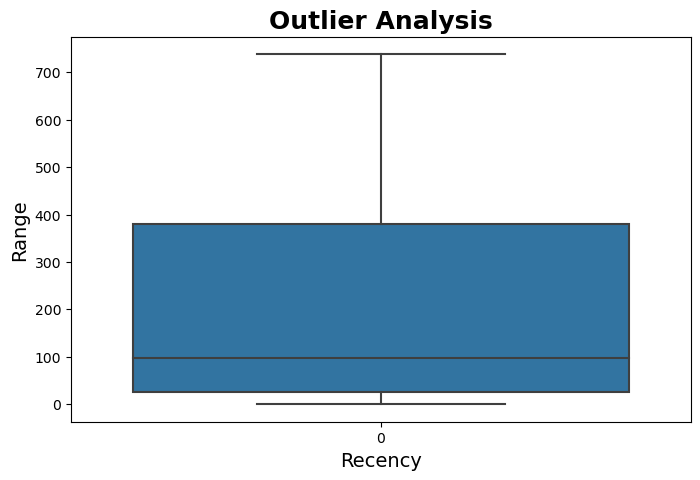

In [46]:
#outlier analysis of recency
plt.figure(figsize=(8,5))
sns.boxplot(rfm['Recency'])
plt.title("Outlier Analysis", fontsize=18, fontweight="bold")
plt.xlabel("Recency", fontsize=14)
plt.ylabel("Range", fontsize=14)

Text(0, 0.5, 'Range')

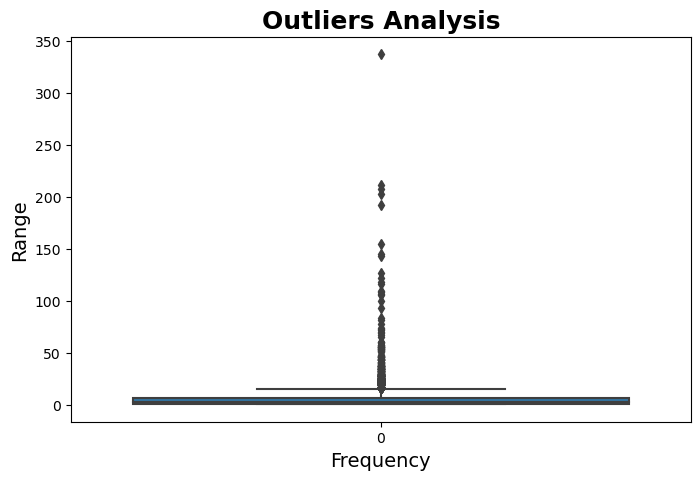

In [47]:
#outlier analysis of frequency
plt.figure(figsize=(8,5))
sns.boxplot(rfm['Frequency'])
plt.title("Outliers Analysis", fontsize=18, fontweight="bold")
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Range", fontsize=14)

Text(0, 0.5, 'Range')

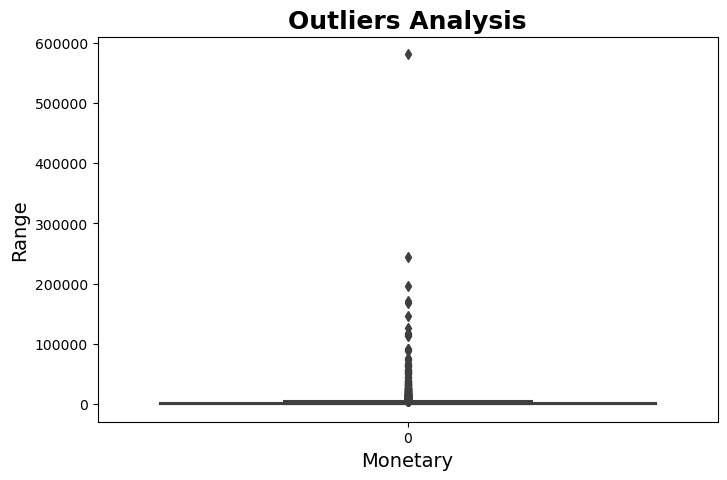

In [48]:
#outlier analysis of monetary
plt.figure(figsize=(8,5))
sns.boxplot(rfm['Monetary'])
plt.title("Outliers Analysis", fontsize=18, fontweight="bold")
plt.xlabel("Monetary", fontsize=14)
plt.ylabel("Range", fontsize=14)

###### As we can see that there are a lot of extreme values or outliers, which will lead to poor quality of clustering. So we need to remove them but removing all of them will result in losing important information. Hence, we are only reducing them.

In [49]:
#reducing outliers from Frequency
Q1 = rfm.Frequency.quantile(0.15)
Q3 = rfm.Frequency.quantile(0.85)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [50]:
#reducing outliers from Monetary
Q1 = rfm.Monetary.quantile(0.15)
Q3 = rfm.Monetary.quantile(0.85)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

In [51]:
rfm.shape

(4989, 4)

Text(0, 0.5, 'Range')

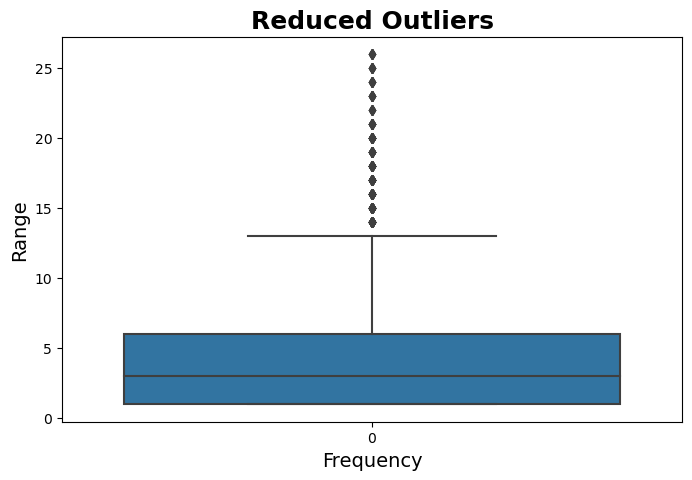

In [52]:
#after reducing outliers
plt.figure(figsize=(8,5))
sns.boxplot(rfm['Frequency'].values)
plt.title("Reduced Outliers", fontsize=18, fontweight="bold")
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Range", fontsize=14)

Text(0, 0.5, 'Range')

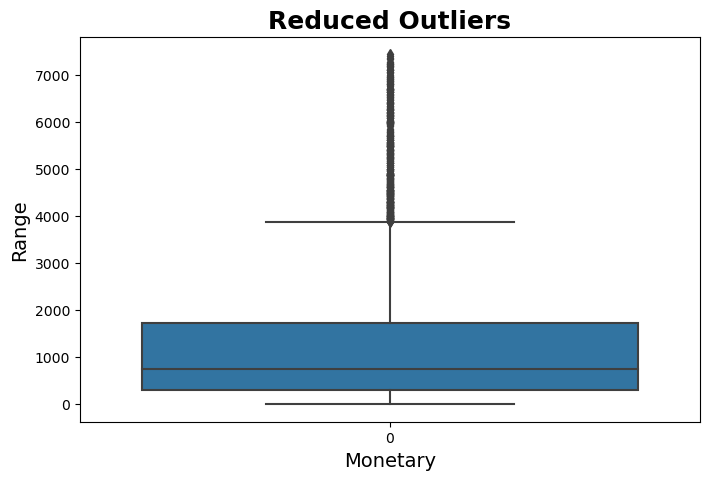

In [53]:
#after reducing outliers
plt.figure(figsize=(8,5))
sns.boxplot(rfm['Monetary'].values)
plt.title("Reduced Outliers", fontsize=18, fontweight="bold")
plt.xlabel("Monetary", fontsize=14)
plt.ylabel("Range", fontsize=14)

<Axes: >

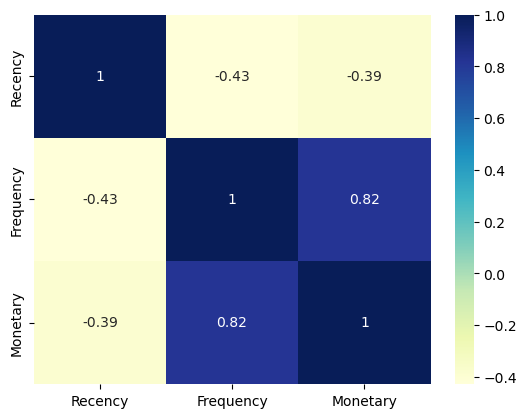

In [58]:
corr = corr = rfm.select_dtypes('number').corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True) 

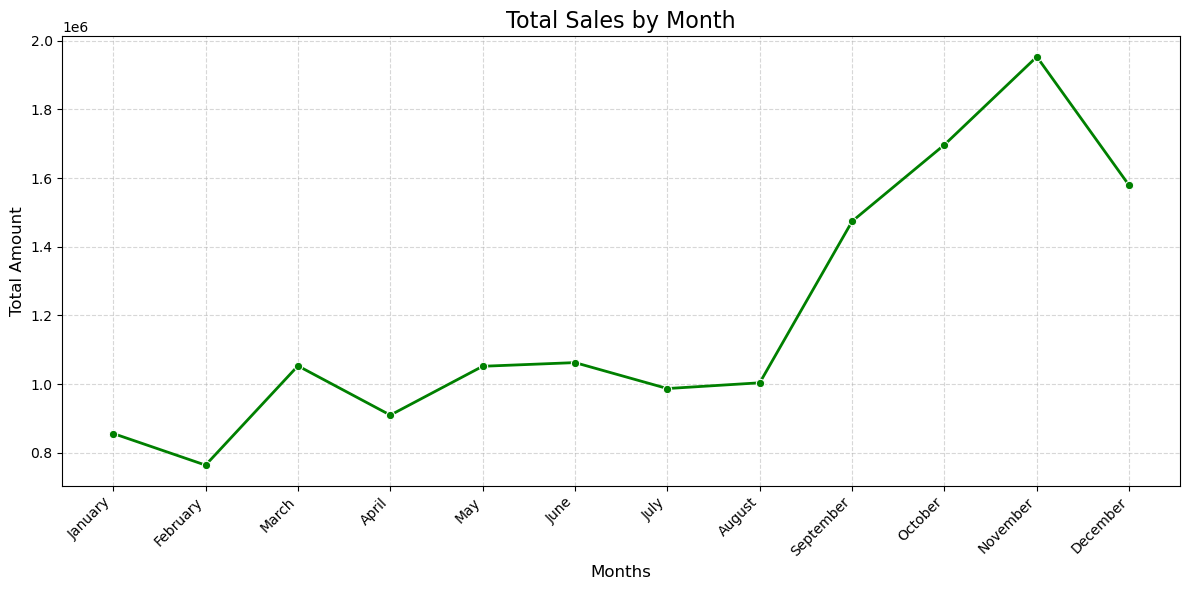

In [55]:
#calculating total sales by month
df['Month'] = df['InvoiceDate'].dt.strftime('%B')  #full month name

#defining the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#converting 'Month' to a categorical type with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

df_months = df.groupby('Month').agg({'Monetary': 'sum'}).reset_index()

#plotting line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_months, x='Month', y='Monetary', marker='o', color='green', linewidth=2)
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  #to add grid lines
plt.tight_layout()

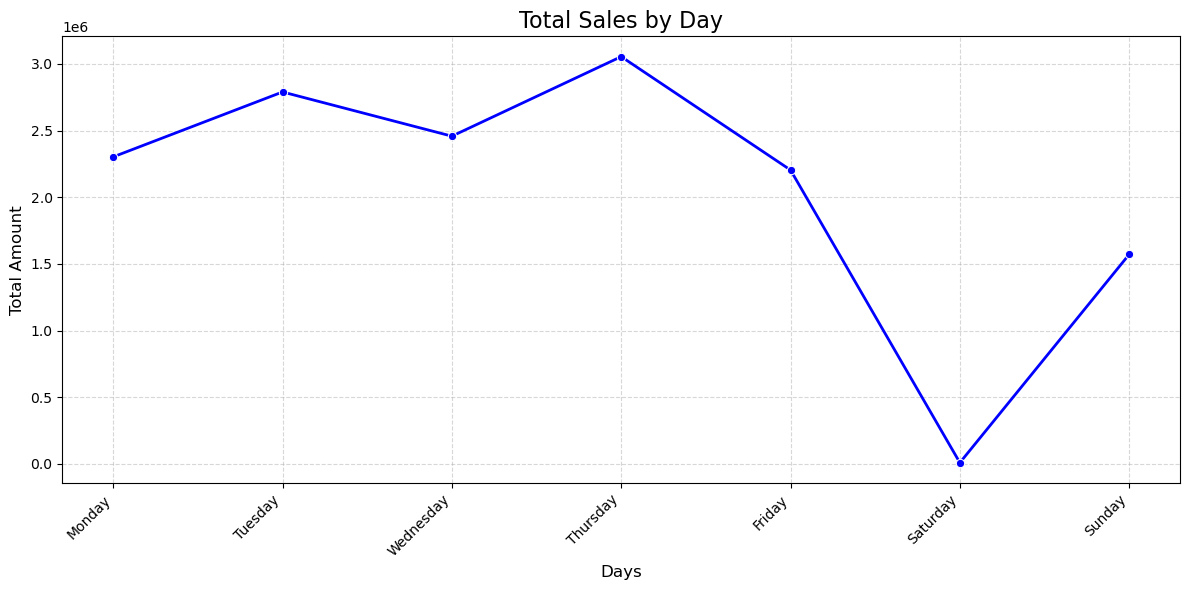

In [56]:
#calculating total sales by day
df['Day'] = df['InvoiceDate'].dt.strftime('%A')  #full day name

#defining the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#converting 'Day' to a categorical type with the specified order
df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)

df_days = df.groupby('Day').agg({'Monetary': 'sum'}).reset_index()

#plotting line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_days, x='Day', y='Monetary', marker='o', color='blue', linewidth=2)
plt.title('Total Sales by Day', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  #to add grid lines
plt.tight_layout()

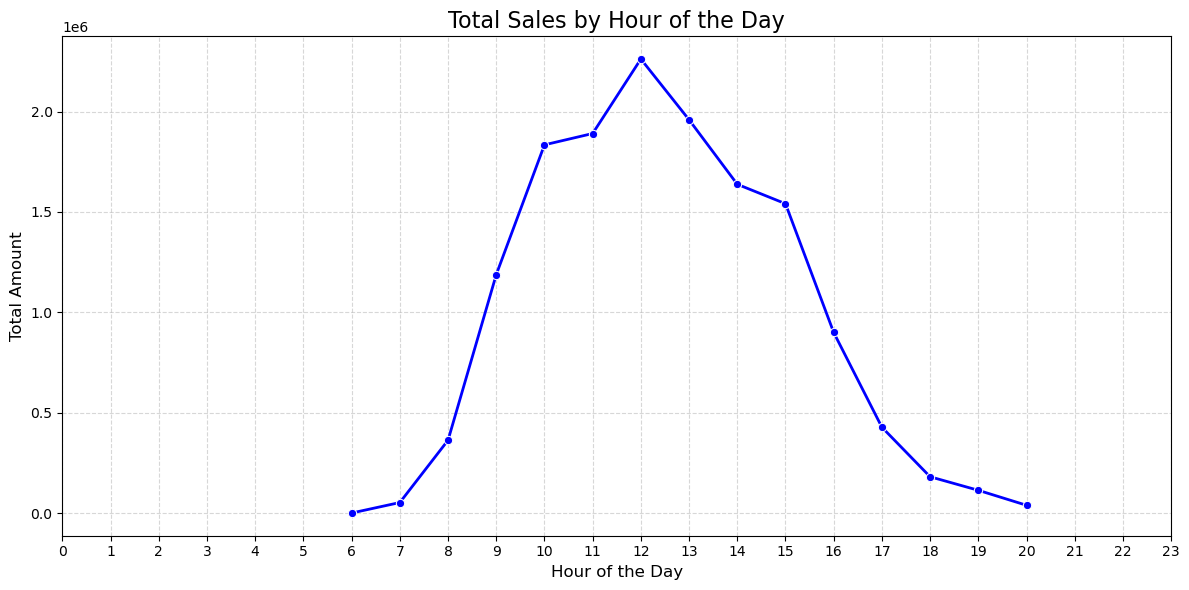

In [57]:
#calculating total sales by hour
df['Hour'] = df['InvoiceDate'].dt.hour

df_hours = df.groupby('Hour').agg({'Monetary': 'sum'}).reset_index()

#plotting line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hours, x='Hour', y='Monetary', marker='o', color='blue', linewidth=2)
plt.title('Total Sales by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.xticks(range(24), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # To add grid lines
plt.tight_layout()

###### Revenue Insights from the Last 2 Years:

* **Month-wise Analysis** - The month of **November** has achieved the maximum revenue.
* **Day-wise Analysis** - **Thursday** has shown the highest revenue generation compared to other days of the week.
* **Hour-wise Analysis** - The peak revenue is observed around **12 noon**, indicating that this is the most profitable time of day.

### Basic Analysis

In [59]:
#creating quantile bins for Recency, Frequency, and Monetary
quantiles = 4

rfm['R_Quartile'] = pd.qcut(rfm['Recency'], quantiles, labels=False, duplicates='drop')
rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], quantiles, labels=False, duplicates='drop')
rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], quantiles, labels=False, duplicates='drop')

In [60]:
#converting quartiles to scores 

rfm['R_Score'] = 4 - rfm['R_Quartile']
rfm['F_Score'] = rfm['F_Quartile'] + 1
rfm['M_Score'] = rfm['M_Quartile'] + 1

In [61]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [62]:
rfm.head()

CustomerID  Recency  Frequency  Monetary  R_Quartile  F_Quartile  \
1    12608.0      404          1    415.79           3           0   
2    12745.0      486          2    723.85           3           0   
3    12746.0      540          1    254.55           3           0   
6    12749.0        3          9   6897.36           0           2   
7    12777.0      457          1    519.45           3           0   

   M_Quartile  R_Score  F_Score  M_Score RFM_Score  
1           1        1        1        2       112  
2           1        1        1        2       112  
3           0        1        1        1       111  
6           3        4        3        4       434  
7           1        1        1        2       112

In [63]:
def customer_segment(row):
    if row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'High-Value Customers'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'At-Risk Customers'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] < 3:
        return 'Potential Loyalists'
    elif row['R_Score'] >= 3 and row['F_Score'] < 3 and row['M_Score'] < 3:
        return 'New Customers'
    else:
        return 'Low-Value Customers'

In [64]:
rfm['Segment'] = rfm.apply(customer_segment, axis=1)

In [65]:
rfm['Segment'].value_counts()

Segment
Low-Value Customers     3154
High-Value Customers     872
New Customers            794
At-Risk Customers        161
Potential Loyalists        8
Name: count, dtype: int64

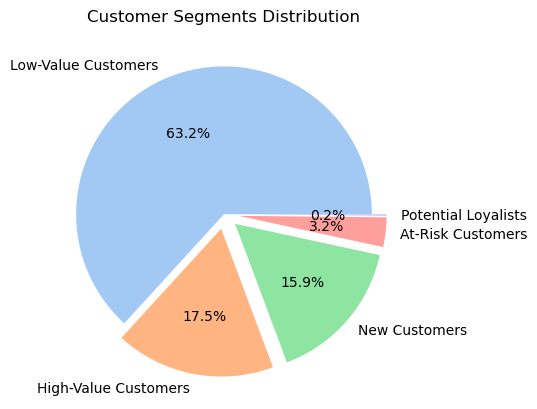

In [66]:
data = rfm['Segment'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', explode=[0, 0.1, 0.1, 0.1, 0.1], colors=sns.color_palette('pastel'))
plt.title('Customer Segments Distribution')
plt.show()

### Conclusions and Insights

Total number of customers are **4989** out of which we have derived the following segments -

1) **<mark style='background: pink'>Low-Value Customers (63.2%)** - The majority of the customer base falls into the low-value segment. This indicates that these customers have either infrequent purchases, low spending, or both.
2) **<mark style='background: lightblue'>High-Value Customers (17.5%)** - This segment represents a smaller portion of the customer base but likely contributes significantly to your revenue. High-value customers are those who purchase frequently and spend more.
3) **<mark style='background: khaki'>New Customers (15.9%)** - A good number of new customers are entering the customer base. This is a positive sign, indicating successful acquisition strategies.
4) **<mark style='background: lightgreen'>At-Risk Customers (3.2%)** - This segment is relatively small but important to address. At-risk customers are those who have shown signs of declining engagement or spending.
5) **<mark style='background: thistle'>Potential Loyalists (0.2%)** - This is a very small segment, indicating that only a few customers are on the verge of becoming loyal customers.

### Scaling the Features

###### KMeans is highly affected by the outliers. Hence, using Robust Scaler which scales features using statistics that are robust to outliers. 

In [67]:
from sklearn.preprocessing import RobustScaler

rfm_df = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = RobustScaler()

rfm_scaled = scaler.fit_transform(rfm_df)

In [68]:
rfm_scaled = pd.DataFrame(rfm_scaled, columns=rfm_df.columns)
rfm_scaled.head()

Recency  Frequency  Monetary
0  0.788301       -0.4 -0.230287
1  1.016713       -0.2 -0.013828
2  1.167131       -0.4 -0.343583
3 -0.328691        1.2  4.324000
4  0.935933       -0.4 -0.157450

In [69]:
rfm_scaled.shape

(4989, 3)

### Cluster Analysis

### K-Means Clustering

##### Finding the optimal number of clusters

#### 1) Elbow Curve

Text(0.5, 1.0, 'Elbow Curve')

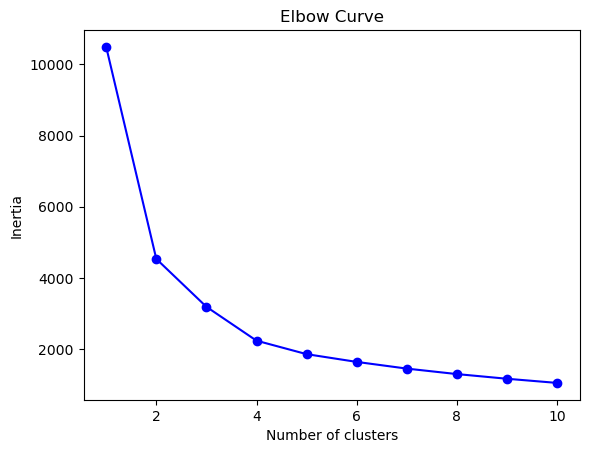

In [70]:
from sklearn.cluster import KMeans

ssd = []
K = range(1,11)
for i in K:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    ssd.append(kmeans.inertia_)
    
#plotting the curve
plt.plot(K, ssd, 'bo-', markersize=6)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

###### Based on the Elbow Curve, 3 clusters appear to be the optimal choice, as this is where the inertia starts to flatten out. However, 4 clusters can also be considered if a more detailed segmentation is needed. The choice between 3 and 4 clusters depends upon the business objectives.

#### 2) Silhouette Analysis

For n_clusters = 2, the average silhouette score is : 0.5783129753636818


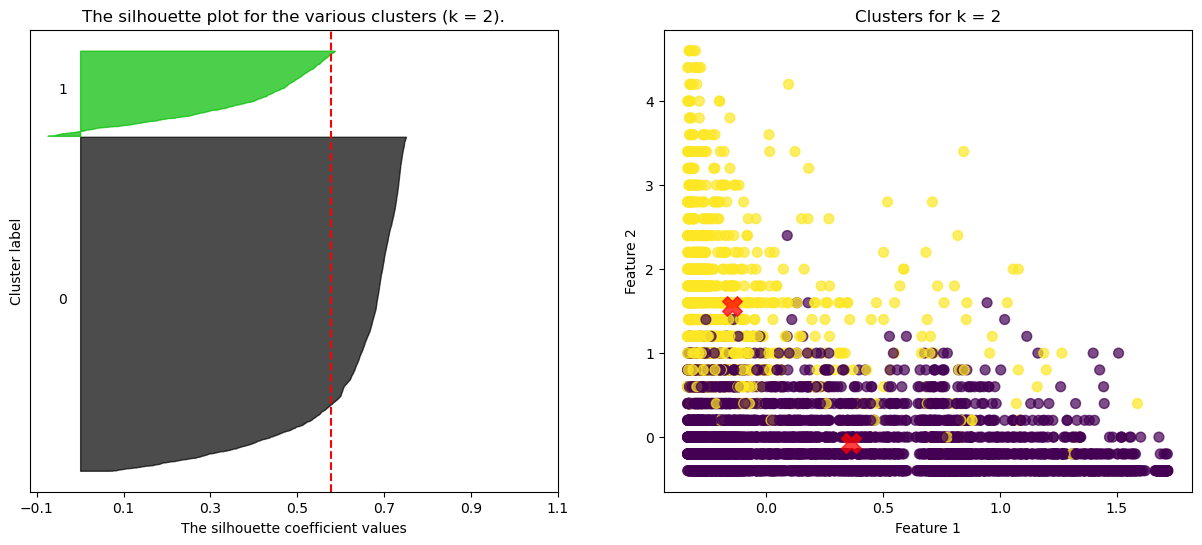

For n_clusters = 3, the average silhouette score is : 0.40346297980870494


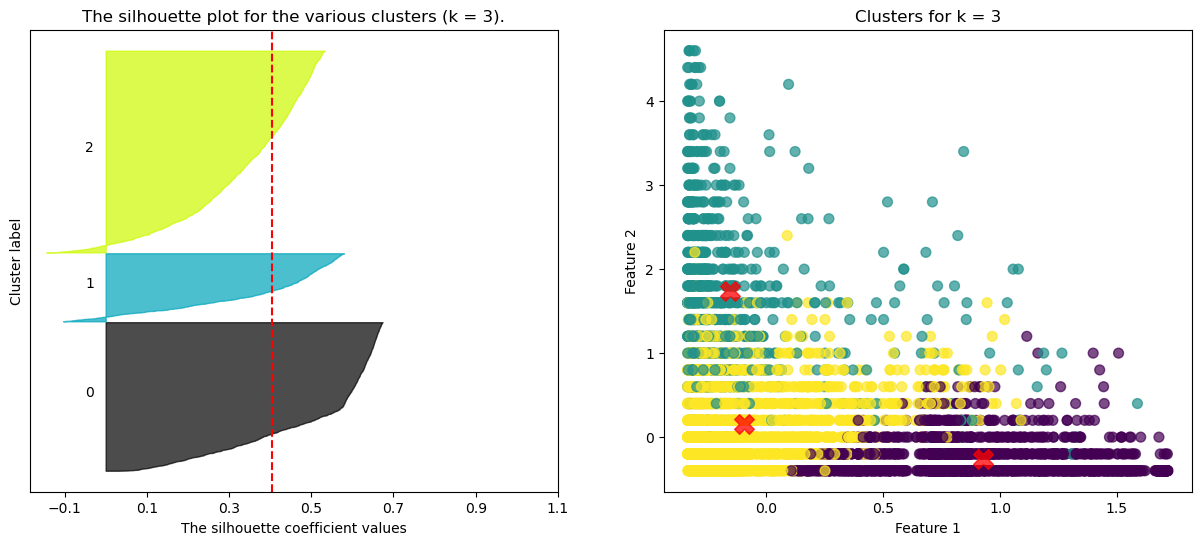

For n_clusters = 4, the average silhouette score is : 0.4206117740903649


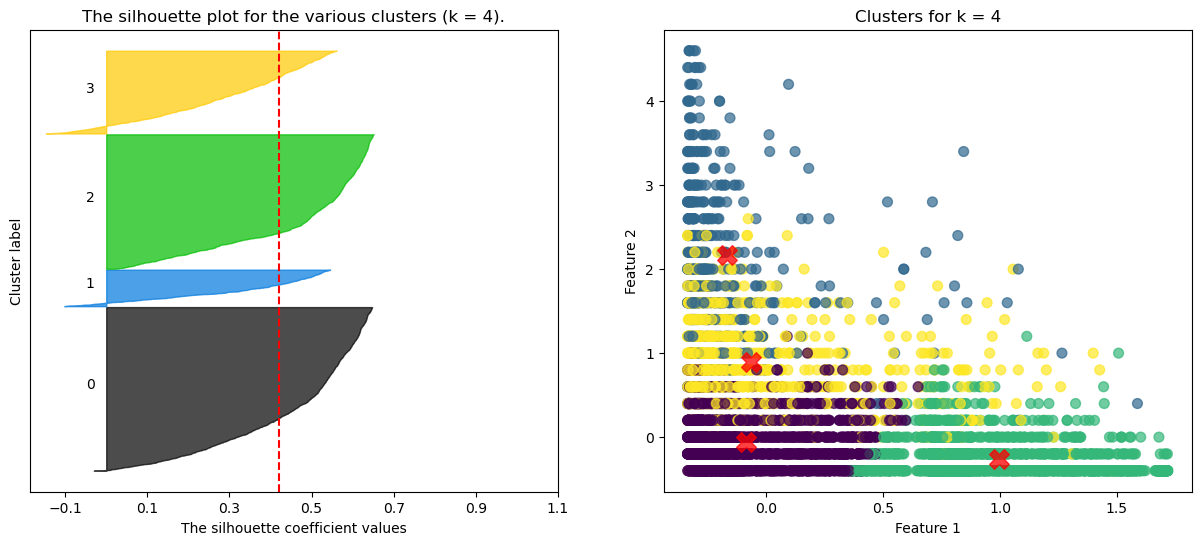

For n_clusters = 5, the average silhouette score is : 0.3993180279674248


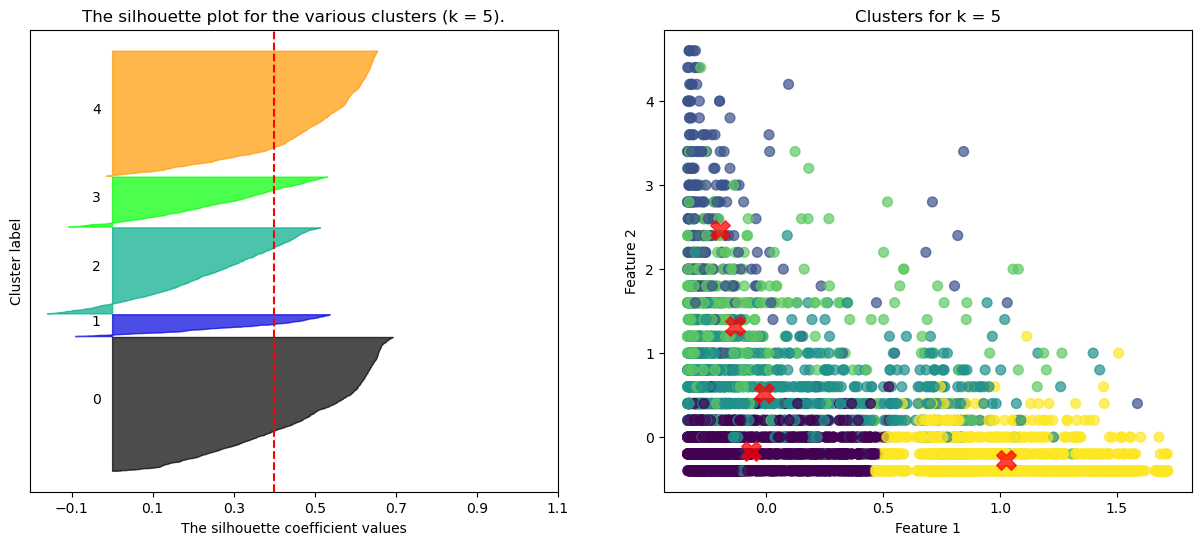

For n_clusters = 6, the average silhouette score is : 0.3968506457488771


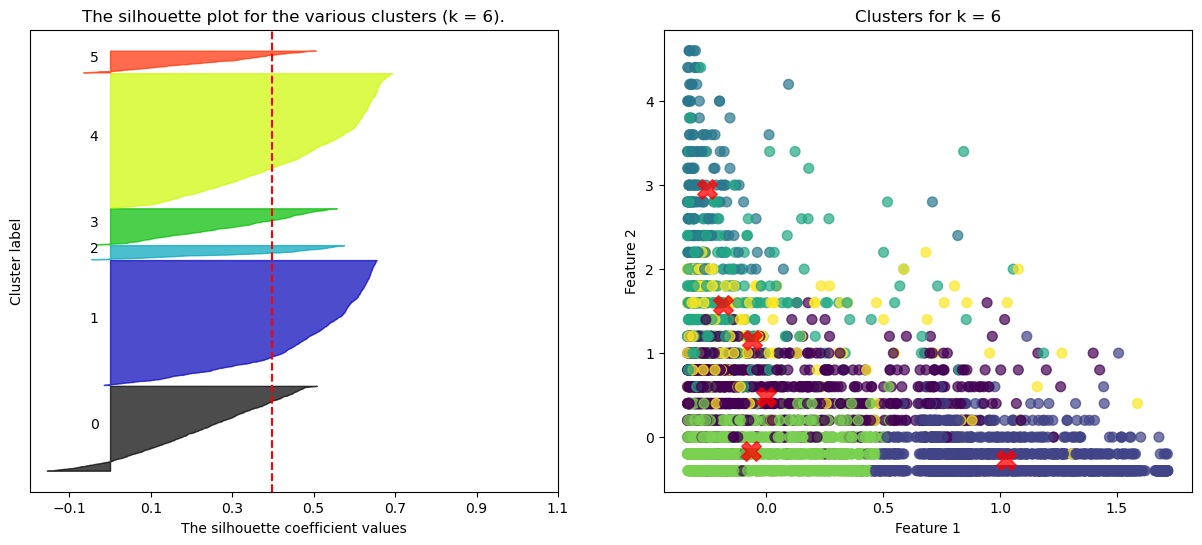

For n_clusters = 7, the average silhouette score is : 0.3785453610511221


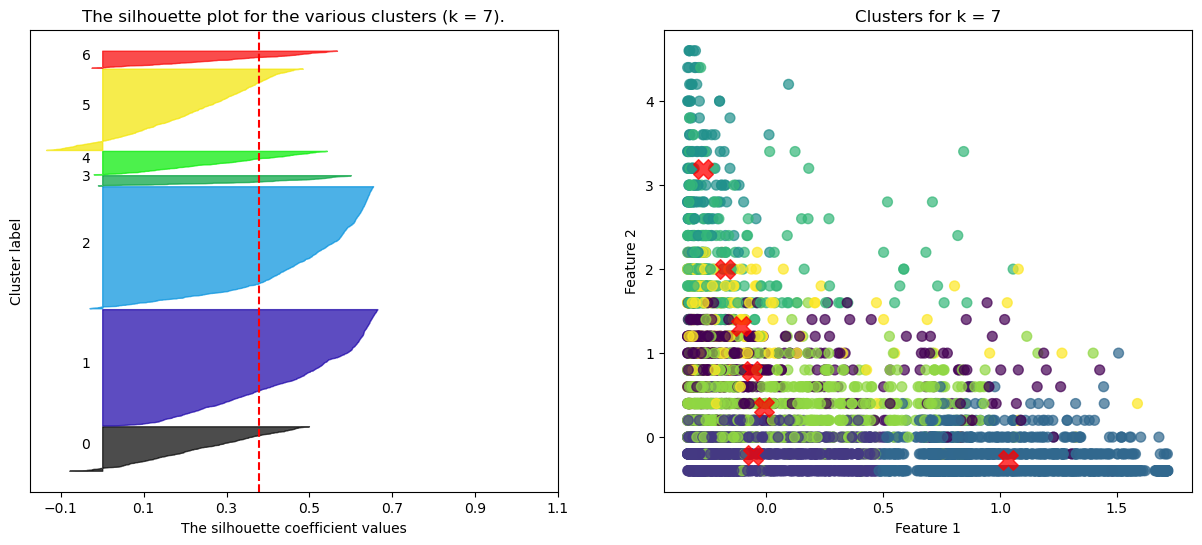

For n_clusters = 8, the average silhouette score is : 0.35059690003186805


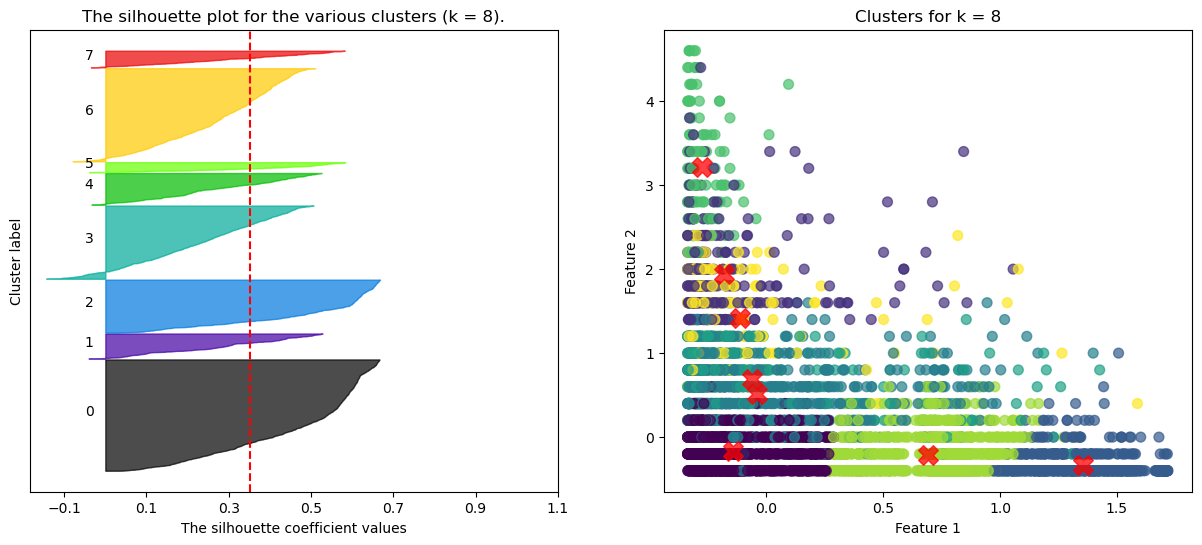

For n_clusters = 9, the average silhouette score is : 0.36430499131007615


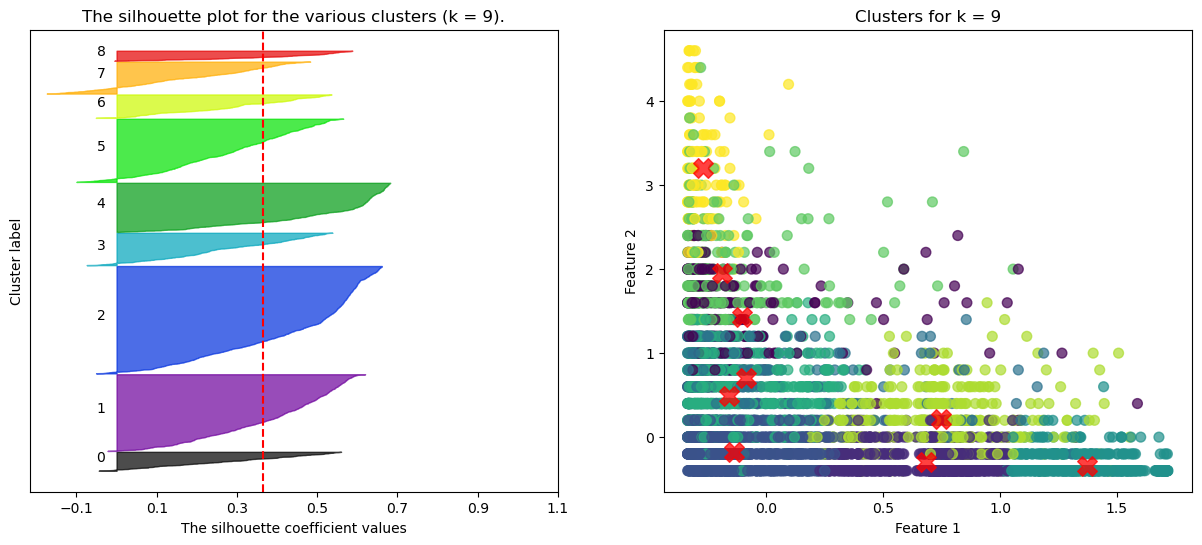

For n_clusters = 10, the average silhouette score is : 0.36161563414381603


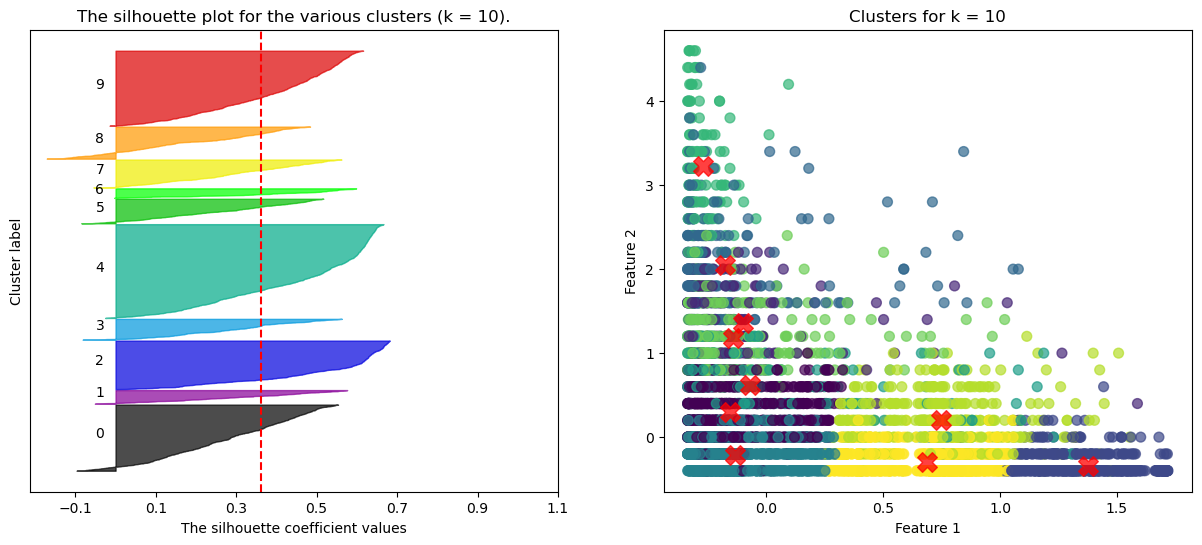

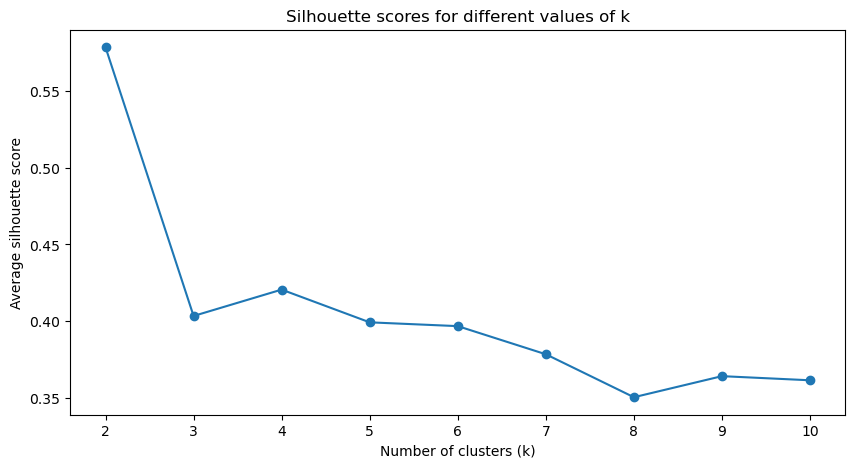

In [71]:
from sklearn.metrics import silhouette_score, silhouette_samples

k_range = range(2, 11)
silhouette_avgs = []
silhouette_scores = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    
    #computing the silhouette scores
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
    #computing the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rfm_scaled, cluster_labels)
    silhouette_scores[k] = sample_silhouette_values
    
    print(f"For n_clusters = {k}, the average silhouette score is : {silhouette_avg}")
    
    #plotting silhouette graph
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    #silhouette plot
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title(f"The silhouette plot for the various clusters (k = {k}).")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels/ticks
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))
    
    # Cluster plot
    ax2.scatter(rfm_scaled.iloc[:, 0], rfm_scaled.iloc[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    ax2.set_title(f"Clusters for k = {k}")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")
    
    plt.show()

#plot silhouette scores for different k values
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_avgs, marker='o')
plt.title("Silhouette scores for different values of k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average silhouette score")
plt.show()

###### The optimal choice, based on the silhouette scores, is 4 clusters

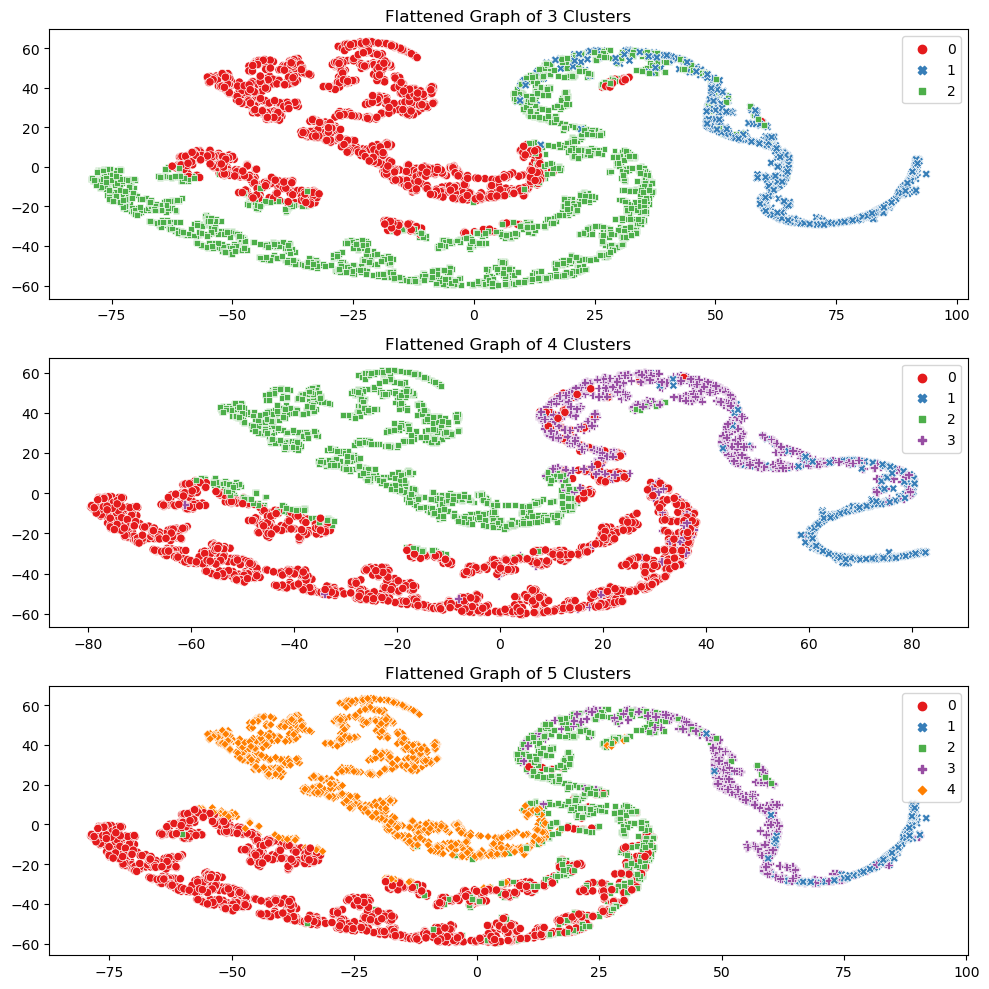

In [72]:
#visualizing clusters
from sklearn.manifold import TSNE

def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters=clusters_number, random_state=42)
    kmeans.fit(normalised_df_rfm)
    
    #to extract cluster labels
    cluster_labels = kmeans.labels_
        
    #to create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    #to initialize TSNE
    model = TSNE(random_state=42)
    transformed = model.fit_transform(df_new)
    
    #to plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(rfm_scaled, 3, rfm_df)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(rfm_scaled, 4, rfm_df)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(rfm_scaled, 5, rfm_df)

plt.tight_layout()

###### The t-SNE graphs indicate that while both 3 and 4 clusters effectively segment the data, the 4-cluster model provides a more detailed view of the data, capturing finer distinctions within the dataset which can be beneficial for detailed analyses and tailored strategies.

In [73]:
#final model with k=4
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(rfm_scaled)

KMeans(n_clusters=4)

In [74]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 3])

In [75]:
#assign the label
rfm_df['Cluster_ID'] = kmeans.labels_
rfm_df.head()

Recency  Frequency  Monetary  Cluster_ID
1      404          1    415.79           2
2      486          2    723.85           2
3      540          1    254.55           2
6        3          9   6897.36           1
7      457          1    519.45           2

In [76]:
rfm_df['Cluster_ID'].value_counts()

Cluster_ID
0    1957
2    1609
3     987
1     436
Name: count, dtype: int64

<Axes: xlabel='Cluster_ID', ylabel='Recency'>

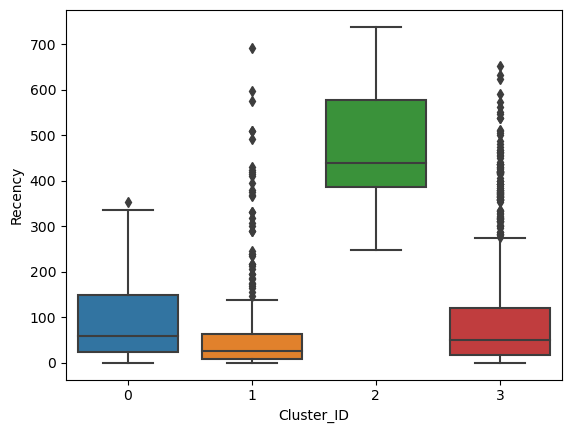

In [77]:
#box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_ID', y='Recency', data=rfm_df)

<Axes: xlabel='Cluster_ID', ylabel='Frequency'>

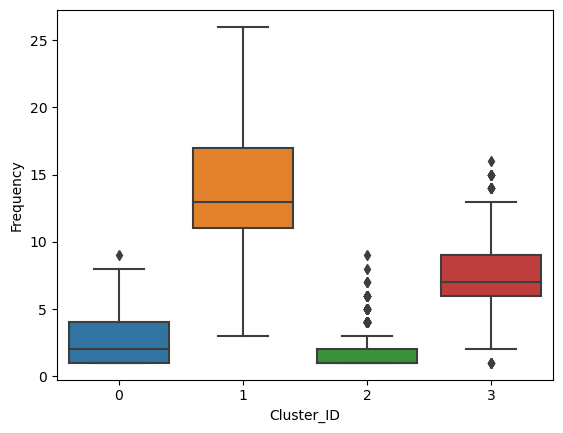

In [78]:
#box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_ID', y='Frequency', data=rfm_df)

<Axes: xlabel='Cluster_ID', ylabel='Monetary'>

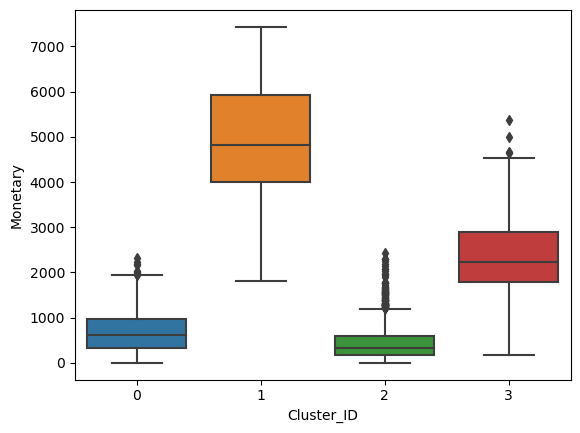

In [79]:
#box plot to visualize Cluster Id vs Monetary
sns.boxplot(x='Cluster_ID', y='Monetary', data=rfm_df)

### Hierarchical Clustering

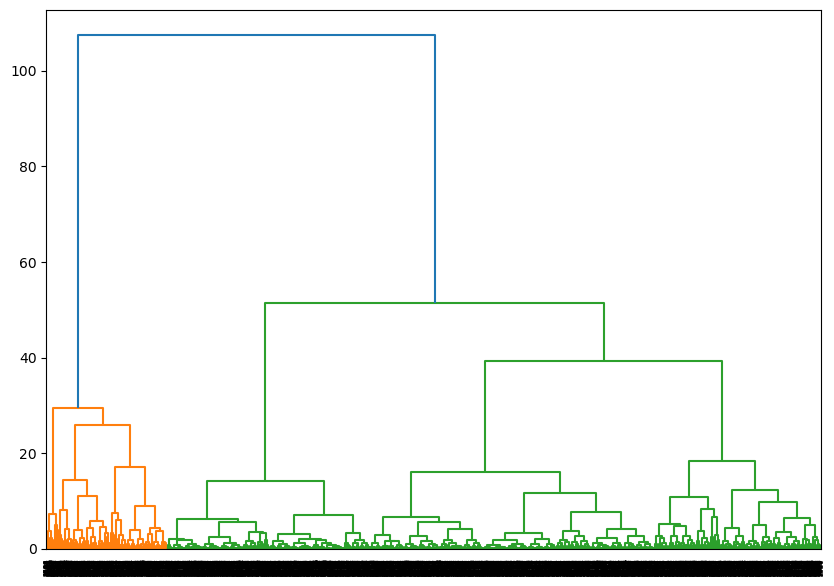

In [80]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(10,7))
mergings = linkage(rfm_scaled, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

###### Based on the dendrogram, a good starting point for the number of clusters would be 2 or 4. However, 4 seems reasonable as it provides more detailed segmentation while avoiding over-segmentation. 

##### Cutting the Dendrogram based on K

In [81]:
#4 clusters
from scipy.cluster.hierarchy import cut_tree

cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 3, 1])

In [82]:
#assign cluster labels
rfm_df['Cluster_Labels'] = cluster_labels
rfm_df.head()

Recency  Frequency  Monetary  Cluster_ID  Cluster_Labels
1      404          1    415.79           2               0
2      486          2    723.85           2               0
3      540          1    254.55           2               0
6        3          9   6897.36           1               1
7      457          1    519.45           2               0

<Axes: xlabel='Cluster_Labels', ylabel='Recency'>

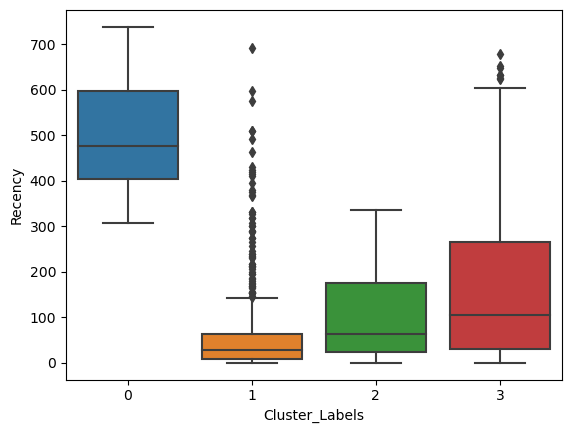

In [83]:
#plotting cluster labels vs recency
sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm_df)

<Axes: xlabel='Cluster_Labels', ylabel='Frequency'>

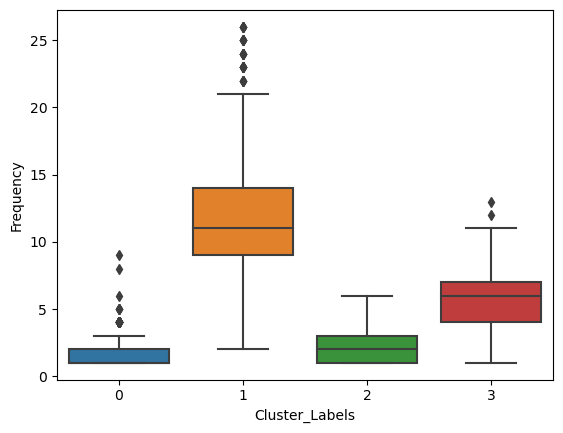

In [84]:
#plotting cluster labels vs frequency
sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm_df)

<Axes: xlabel='Cluster_Labels', ylabel='Monetary'>

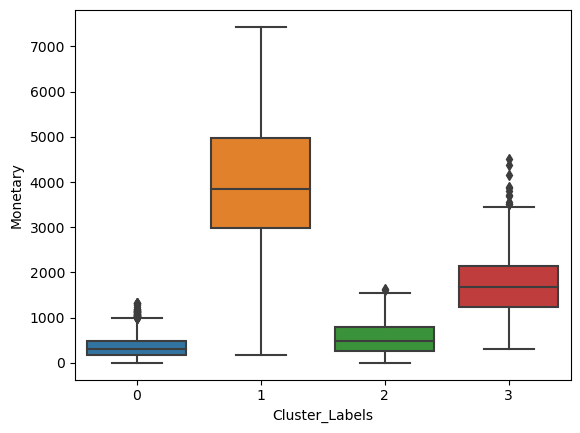

In [85]:
#plotting cluster labels vs monetary
sns.boxplot(x='Cluster_Labels', y='Monetary', data=rfm_df)

## Final Conclusion

### K-Means Clustering with 4 Cluster IDs
* **<mark style='background: khaki'>Cluster 0** - This cluster represents <mark style='background: khaki'>moderately active customers who transact infrequently and spend relatively low amounts</mark>. Implementing targeted promotions and loyalty programs can increase their engagement and spending.
* **<mark style='background: lightgreen'>Cluster 1** - This cluster consists of <mark style='background: lightgreen'>highly active and high-spending customers</mark>. They are engaged and valuable, making them ideal for premium offers and exclusive deals to maintain their high spending.
* **<mark style='background: lightpink'>Cluster 2** - This cluster includes <mark style='background: lightpink'>customers who have mostly lapsed</mark> but includes a few high-frequency and high-spending outliers. Targeted re-engagement campaigns can help revive these customers' activity.
* **<mark style='background: lightblue'>Cluster 3** - This cluster consists of <mark style='background: lightblue'>recently active customers with moderate spending and transaction frequency</mark>. Personalized offers and upselling strategies can encourage increased spending and engagement.

### Hierarchical Clustering with 4 Cluster Labels
* **<mark style='background: khaki'>Cluster 0** - This cluster has <mark style='background: khaki'>high recency, low frequency, and low monetary values</mark>. Implementing targeted promotions and loyalty programs can increase their engagement and spending.
* **<mark style='background: lightgreen'>Cluster 1** - This cluster consists of <mark style='background: lightgreen'>highly active, high-frequency, and high-spending customers</mark> with significant outliers. Retain these high-value customers with exclusive rewards and personalized offers.
* **<mark style='background: lightpink'>Cluster 2** - This cluster has <mark style='background: lightpink'>low recency, low frequency, and low monetary value</mark>. Targeted re-engagement campaigns and tailored incentives can help reactivate these customers.
* **<mark style='background: lightblue'>Cluster 3** - This cluster represents <mark style='background: lightblue'>moderately active customers with moderate frequency and monetary value</mark>. Personalized offers and upselling strategies can encourage increased spending and engagement.